## Importações

In [1]:
#importacao de pacotes
import numpy as np
import pandas as pd
import pygwalker as pyg
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import plotly.graph_objects as go

## Funções

In [2]:
#funcao degau bipolar
def bipolar(u):
    return np.where(u >= 0, 1, -1)

#funcao que classifica a amostra com base na rede ja treinada
def previsao(w,x):
  u=np.dot(w.T,x)
  yhat=bipolar(u)
  return yhat

# IMPLEMENTAÇÃO DO PERCEPTRON

In [3]:
#PASSO 1: OBTER O CONJUNTO DE AMOSTRAS DE TREINAMENTO X
#carregar tabela de dados
dados = pd.read_csv("dataset.csv", sep=";")

#analise exploratoria de dados
#walker=pyg.walk(dados)

In [4]:
#quantidade de elementos na amostra
n_amostras=dados.shape[0]
print(n_amostras)

#quantidade variaveis de entrada(subrair a coluna de tipo)
n_variaveis=dados.shape[1]-1
print(n_variaveis)

#separando os dados contendo apenas as variaveis de entrada
x=dados.iloc[:,0:n_variaveis].values
print(x)

30
3
[[-0.6508  0.1097  4.0009]
 [-1.4492  0.8896  4.4005]
 [ 2.085   0.6876 12.071 ]
 [ 0.2626  1.1476  7.7985]
 [ 0.6418  1.0234  7.0427]
 [ 0.2569  0.673   8.3265]
 [ 1.1155  0.6043  7.4446]
 [ 0.0914  0.3399  7.0677]
 [ 0.0121  0.5256  4.6316]
 [-0.0429  0.466   5.4323]
 [ 0.434   0.687   8.2287]
 [ 0.2735  1.0287  7.1934]
 [ 0.4839  0.4851  7.485 ]
 [ 0.4089 -0.1267  5.5019]
 [ 1.4391  0.1614  8.5843]
 [-0.9115 -0.1973  2.1962]
 [ 0.3654  1.0475  7.4858]
 [ 0.2144  0.7515  7.1699]
 [ 0.2013  1.0014  6.5489]
 [ 0.6483  0.2183  5.8991]
 [-0.1147  0.2242  7.2435]
 [-0.797   0.8795  3.8762]
 [-1.0625  0.6366  2.4707]
 [ 0.5307  0.1285  5.6883]
 [-1.22    0.7777  1.7252]
 [ 0.3957  0.1076  5.6623]
 [-0.1013  0.5989  7.1812]
 [ 2.4482  0.9455 11.2095]
 [ 2.0149  0.6192 10.9263]
 [ 0.2012  0.2611  5.4631]]


In [5]:
#inserindo o bias
bias=np.ones((n_amostras,1))*-1
x=np.hstack((x,bias))
print(x)

[[-0.6508  0.1097  4.0009 -1.    ]
 [-1.4492  0.8896  4.4005 -1.    ]
 [ 2.085   0.6876 12.071  -1.    ]
 [ 0.2626  1.1476  7.7985 -1.    ]
 [ 0.6418  1.0234  7.0427 -1.    ]
 [ 0.2569  0.673   8.3265 -1.    ]
 [ 1.1155  0.6043  7.4446 -1.    ]
 [ 0.0914  0.3399  7.0677 -1.    ]
 [ 0.0121  0.5256  4.6316 -1.    ]
 [-0.0429  0.466   5.4323 -1.    ]
 [ 0.434   0.687   8.2287 -1.    ]
 [ 0.2735  1.0287  7.1934 -1.    ]
 [ 0.4839  0.4851  7.485  -1.    ]
 [ 0.4089 -0.1267  5.5019 -1.    ]
 [ 1.4391  0.1614  8.5843 -1.    ]
 [-0.9115 -0.1973  2.1962 -1.    ]
 [ 0.3654  1.0475  7.4858 -1.    ]
 [ 0.2144  0.7515  7.1699 -1.    ]
 [ 0.2013  1.0014  6.5489 -1.    ]
 [ 0.6483  0.2183  5.8991 -1.    ]
 [-0.1147  0.2242  7.2435 -1.    ]
 [-0.797   0.8795  3.8762 -1.    ]
 [-1.0625  0.6366  2.4707 -1.    ]
 [ 0.5307  0.1285  5.6883 -1.    ]
 [-1.22    0.7777  1.7252 -1.    ]
 [ 0.3957  0.1076  5.6623 -1.    ]
 [-0.1013  0.5989  7.1812 -1.    ]
 [ 2.4482  0.9455 11.2095 -1.    ]
 [ 2.0149  0.6192 10

In [6]:
#PASSO 2: DO VETOR DE SAIDAS Y, ASSOCIAR A SAIDA ESPERADA Y PARA CADA X
y=dados.iloc[:,n_variaveis].values
print(y)

#contar quantas amostras de cada classe existem no dataset
print(f"-1: {(y==-1).sum()}")
print(f"1: {(y==1).sum()}")

[-1. -1. -1.  1.  1. -1.  1. -1.  1.  1. -1.  1. -1. -1. -1. -1.  1.  1.
  1.  1. -1.  1.  1.  1.  1. -1. -1.  1. -1.  1.]
-1: 14
1: 16


In [7]:
#PASSO 3: INICIALIZAR O VETOR DE PESOS W COM VALORES ALEATORIOS
w=np.random.uniform(-1,1,n_variaveis+1)
print(w)

[ 0.89146145  0.85446842 -0.50165603 -0.61629626]


In [8]:
#PASSO 4: DEFINIR A TAXA DE APRENDIZAGEM COM VALOR ENTRE 0 E 1
#taxa de aprendizagem eta
eta=0.01

#PASSO 5: CALCULAR O NUMERO DE AMOSTRAS EM X
#ja foi feito e esta em n_amostras

#PASSO 6: DEFINIR A TOLERANCIA AO ERRO
tolerancia=0.01

#PASSO 7: SETAR O ERRO INICIAL MAIOR QUE A TOLERANCIA
erro_medio=tolerancia+1

#PASSO 8: CRIAR O VETOR QUE IRA ARMAZENAR O ERRO DE TODAS AS EPOCAS, EPOCA A EPOCA
erro_epocas=[]

#PASSO 9: INICIALIZA O CONTADOR DE EPOCAS
epoca=0

#PASSO 10: DEFINE O MAXIMO DE EPOCAS
max_epocas=500

In [9]:
#PASSO 11 E 12: SETA OS CRITERIOS DE PARADA
criterio_erro=True
criterio_epocas=True

#PASSO 13: ENQUANTO O ERRO FOR MAIOR QUE A TOLERANCIA E O MAXIMO DE EPOCAS NAO FOR ATINGIDO, CONTINUE O TREINO
while (criterio_erro==True and criterio_epocas==True):
  #PASSO 14: SETA O ERRO DA EPOCA ATUAL COM ZERO NO INICIO DE CADA EPOCA
  erro_atual=0

  #PASSO 15: INCREMENTA O CONTADOR DE EPOCAS PARA SABER EM QUE EPOCA A RNA ESTA TREINANDO
  epoca = epoca+1

  #PASSO 16: EMBARALHA OS INDICES PARA BUSCAR AMOSTRAS ALEATORIAMENTE NO CONJUNTO X
  indices_embaralhados=np.random.permutation(n_amostras)

  #PASSO 17: PARA CADA AMOSTRA NO CONJUNTO X FACA
  for i in range(n_amostras):
    #captura o indice da amostra atual a ser apresentada da RNA
    indice_amostra=indices_embaralhados[i]
    #captura a amostra atual a ser apresentada a RNA
    xi_amostra=x[indice_amostra,:]

    #PASSO 18: CALCULA O POTENCIAL DE ATIVACAO U
    u=np.dot(w.T,xi_amostra)

    #PASSO 19: CALCULA A SAIDA PREVISTA COM BASE NA FUNCAO DE ATIVACAO
    yhat=bipolar(u)

    #PASSO 20: CALCULA O ERRO ENTRE O VALOR ESPERADO E O VALOR PREVISTO
    e=y[indice_amostra]-yhat

    #PASSO 21: ATUALIZA OS PESOS APLICANDO A REGRA DE HEBB
    w=w+((eta*e)*xi_amostra)

    #PASSO 22: ACUMULADOR DE ERROS DE TODAS AS AMOSTRAS
    erro_atual=erro_atual+np.abs(e)

  #PASSO 23: CALCULA O ERRO MEDIO DA EPOCA
  erro_medio=erro_atual/n_amostras

  #PASSO 24: ARMAZENA O ERRO MEDIO DA EPOCA ATUAL NO VETOR DE ERROS DE TODAS AS EPOCAS
  erro_epocas.append(erro_medio)

  #PASSO 25 E 26: VERIFICA E ATUALIZA OS CRITERIOS DE PARADA
  criterio_erro=(erro_medio>=tolerancia)
  criterio_epocas=(epoca<=max_epocas)

## 3. Evolução do erro médio

O gráfico de `erro médio x épocas` mostra que o erro diminui ao longo do treinamento, indicando que a RNA está aprendendo a separar as classes e tambem os pesos finais obtidos foram todos válidos como mostrado abaixo


Conjunto ideal de pesos w*
[ 1.07182745  1.85116642 -0.48738003 -2.01629626]
Épocas necessárias para convergir
107


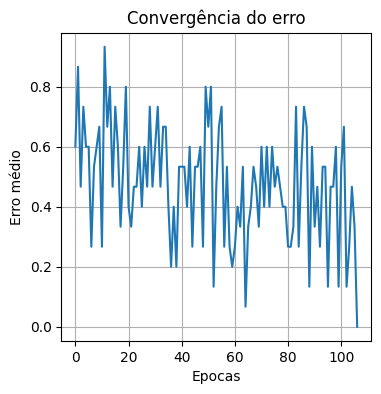

In [20]:
#exibindo os pesos calibrados pela regra de Hebb
print('Conjunto ideal de pesos w*')
print(w)

print('Épocas necessárias para convergir')
print(epoca)

#plotando a convergencia do algoritmo com base no erro epoca a epoca
plt.figure(figsize=(4,4))
plt.plot(erro_epocas[:max_epocas])
plt.title('Convergência do erro')
plt.xlabel('Epocas')
plt.ylabel('Erro médio')
plt.grid(True)
plt.show()

## ANÁLISE DA QUALIDADE DE CLASSIFICAÇÃO

## 4. Qualidade da classificação

A matriz de confusão mostra a quantidade de acertos e erros de cada classe e abaixo a acuracia.

[-1. -1. -1.  1.  1. -1.  1. -1.  1.  1. -1.  1. -1. -1. -1. -1.  1.  1.
  1.  1. -1.  1.  1.  1.  1. -1. -1.  1. -1.  1.]


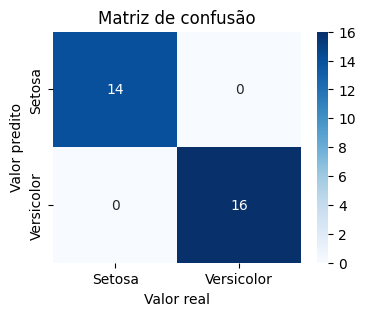

Acuracia=100.0%


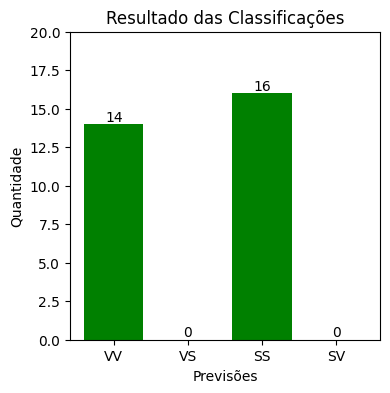

In [19]:
#cria um vetor para receber todas as previsoes realizadas pela RNA
yhat=np.zeros(n_amostras)

#armazenar todas as previsoes uma para cada amostra
for i in range(n_amostras):
  yhat[i] = previsao(w,x[i,:])
print(yhat)

#converter -1 em 0 para melhor visualizar a matriz de confusão
yhat_display=np.where(yhat==-1,0,yhat)
y_display=np.where(y==-1,0,y)

#gera a matriz de confusao
cm=confusion_matrix(y_display,yhat_display)

#plotar matriz de confusao crocante
plt.figure(figsize=(4,3))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',
            xticklabels=['Setosa','Versicolor'],
            yticklabels=['Setosa','Versicolor'])
plt.title('Matriz de confusão')
plt.xlabel('Valor real')
plt.ylabel('Valor predito')
plt.show()

#calculo da acuracia
acuracia=(np.sum(yhat==y)/n_amostras)*100
print(f"Acuracia={acuracia}%")

#grafico de barras
if cm.shape == (2, 2):
   resultado = [cm[0, 0], cm[0, 1], cm[1, 1], cm[1, 0]]
   labels = ['VV', 'VS', 'SS', 'SV']
   colors = ['green', 'red', 'green', 'red']

   plt.figure(figsize=(4, 4))
   plt.bar(labels, resultado, color=colors)
   plt.xlabel('Previsões')
   plt.ylabel('Quantidade')
   plt.title('Resultado das Classificações')
   plt.ylim(0, 20)
   for i, v in enumerate(resultado):
      plt.text(i, v + 0.2, str(v), ha='center')
   plt.show()

## 5. Influência dos parâmetros na RNA

- **Taxa de aprendizagem (η):** valores menores tornam o aprendizado mais lento; valores muito grandes podem gerar oscilações nos pesos.  
- **Número de épocas:** poucas épocas podem impedir a convergência; muitas aumentam o tempo sem melhorar muito a acurácia.  
- **Tolerância:** maior tolerância para de treinar cedo; menor tolerância exige mais épocas.  

**Conclusão:** Com os parâmetros iniciais (`η=0.01`, `max_epocas=500`, `tolerancia=0.01`) a RNA funcionou bem, não foi necessário mudar nada.


In [15]:
#criar grafico 3d interativo
colors = ['red' if y == -1 else 'blue' for y in yhat]

#criar malha para o hiperplano
x1_range = np.linspace(x[:, 0].min() - 0.5, x[:, 0].max() + 0.5, 20)
x2_range = np.linspace(x[:, 1].min() - 0.5, x[:, 1].max() + 0.5, 20)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

#calcular x3 para o hiperplano: w0*x1 + w1*x2 + w2*x3 + w3*(-1) = 0
#x3 = (w0*x1 + w1*x2 - w3) / (-w2)
x3_grid = (w[0] * x1_grid + w[1] * x2_grid - w[3]) / (-w[2])

fig = go.Figure()

#adicionar o hiperplano
fig.add_trace(go.Surface(
   x=x1_grid,
   y=x2_grid,
   z=x3_grid,
   colorscale='gray',
   opacity=0.3,
   showscale=False,
   name='Hiperplano'
))

#adicionar os pontos
fig.add_trace(go.Scatter3d(
   x=x[:, 0],
   y=x[:, 1],
   z=x[:, 2],
   mode='markers',
   marker=dict(
      size=8,
      color=colors,
      opacity=0.8,
      line=dict(width=1, color='white')
   ),
   name='Amostras'
))

fig.update_layout(
   title='Classificação',
   scene=dict(
      xaxis_title='x1',
      yaxis_title='x2',
      zaxis_title='x3'
   ),
   width=800,
   height=600
)

## 7. Conclusões

A RNA conseguiu classificar corretamente a maioria das amostras, com boa acurácia.  
O erro médio diminuiu ao longo das épocas e os pesos se mantiveram estáveis.  
Os parâmetros iniciais foram suficientes para o modelo funcionar sem ajustes.
